In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cory/.pyenv/versions/dl-venv/lib/python3

1.14.0


/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cory/.pyenv/version

In [2]:
cifar100 = keras.datasets.cifar100


(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
print(train_labels[0])
print(test_labels[0])

[19]
[49]


In [5]:
class_names = np.array([
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
])
print(len(class_names))

100


In [6]:
train_images[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [7]:
def display(img):
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()

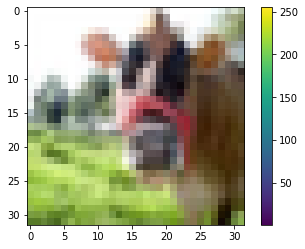

[19]
cattle


In [8]:
display(train_images[0])
label0 = train_labels[0]
print(label0)
print(class_names[label0][0])


We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

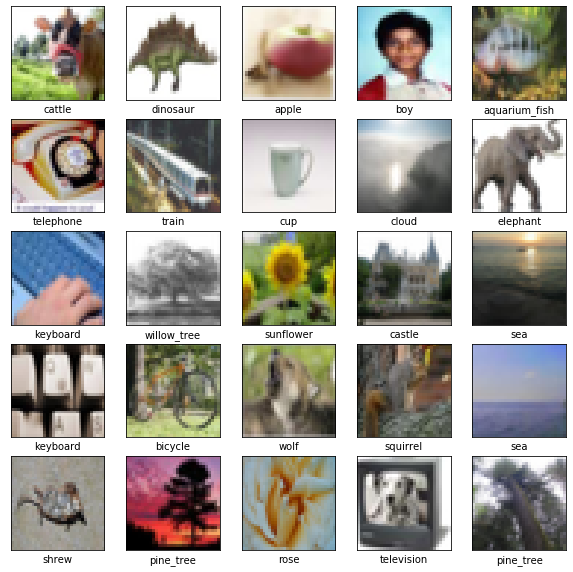

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]][0])
plt.show()

In [11]:
from keras import applications
#help(applications)

Using TensorFlow backend.


In [12]:
resnet50 = applications.resnet50.ResNet50(
    include_top=False,
    input_shape=train_images.shape[1:],
    pooling='avg'
)
print(type(resnet50))
print(resnet50)

W0804 00:54:57.034632 140410815594624 deprecation_wrapper.py:119] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 00:54:57.044108 140410815594624 deprecation_wrapper.py:119] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 00:54:57.047473 140410815594624 deprecation_wrapper.py:119] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0804 00:54:57.066907 140410815594624 deprecation_wrapper.py:119] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_se

<class 'keras.engine.training.Model'>


In [13]:
import utils
for p in utils.properties_names(resnet50):
    print('resnet50.', p, sep='')

resnet50._built
resnet50._compute_previous_mask
resnet50._expects_training_arg
resnet50._feed_input_names
resnet50._feed_input_shapes
resnet50._feed_inputs
resnet50._inbound_nodes
resnet50._initial_weights
resnet50._input_coordinates
resnet50._input_layers
resnet50._is_compiled
resnet50._is_graph_network
resnet50._layers
resnet50._layers_by_depth
resnet50._losses
resnet50._network_nodes
resnet50._nodes_by_depth
resnet50._outbound_nodes
resnet50._output_coordinates
resnet50._output_layers
resnet50._output_mask_cache
resnet50._output_shape_cache
resnet50._output_tensor_cache
resnet50._per_input_losses
resnet50._per_input_updates
resnet50._updates
resnet50._uses_inputs_arg
resnet50.input_names
resnet50.inputs
resnet50.name
resnet50.optimizer
resnet50.output_names
resnet50.outputs
resnet50.supports_masking
resnet50.trainable


In [14]:
print('Inputs:')
print(resnet50.input_names, ':', resnet50.inputs)
print()

layers = resnet50._layers
print('Layers:', len(layers))
print()

print('Outputs:')
print(resnet50.output_names, ':', resnet50.outputs)

Inputs:
['input_1'] : [<tf.Tensor 'input_1:0' shape=(?, 32, 32, 3) dtype=float32>]

Layers: 176

Outputs:
['global_average_pooling2d_1'] : [<tf.Tensor 'global_average_pooling2d_1/Mean:0' shape=(?, 2048) dtype=float32>]


In [15]:
for k, v in sorted(layers[len(layers) - 1].__dict__.items()):
    print(k, ':', v)

_built : True
_inbound_nodes : [<keras.engine.base_layer.Node object at 0x7fb262d58eb8>]
_initial_weights : None
_losses : []
_non_trainable_weights : []
_outbound_nodes : []
_per_input_losses : {}
_per_input_updates : {}
_trainable_weights : []
_updates : []
data_format : channels_last
input_spec : InputSpec(ndim=4)
name : global_average_pooling2d_1
stateful : False
supports_masking : False
trainable : True


In [16]:
i = j = 0

stage = 0

def print_layer(i, l):
    s = '%03d' % i
    s += ': ' + type(l).__name__.ljust(22)
    s += ': ' + l.name.ljust(15)
    s += ' ({})'.format(l.dtype) if hasattr(l, 'dtype') else ''
    s += ' {}'.format(l.kernel.shape) if hasattr(l, 'kernel') else ''
    s += ' {}'.format(l.kernel_size) if hasattr(l, 'kernel_size') else ''
    s += ' {}'.format(l.batch_input_shape) if hasattr(l, 'batch_input_shape') else ''
    s += ' {}'.format(l.activation.__name__) if hasattr(l, 'activation') else ''
    print(s)
    
def print_layers(l, offset=0):
    for i, layer in enumerate(l):
        print_layer(offset + i, layer)

def print_conv_block(l):
    global i, j, stage
    stage += 1
    print()
    i = j
    j += 13 if stage == 2 else 12
    print('=============== ', stage, ': Conv Block ==========', sep='')
    print_layers(l[i:j], i)

def print_identity_block(l):
    global i, j, stage
    i = j
    j += 10
    print('=============== ', stage, ': Identity Block =======', sep='')
    print_layers(l[i:j], i)

def print_all_layers(layers):
    global i, j, stage
    i = j = 0
    print('=============== ', stage, ': Input ===============', sep='')
    print_layer(i, layers[i])

    stage += 1
    print()

    print('=============== ',stage, ': Input ===============', sep='')
    i = 1
    j = 6
    print_layers(layers[i:j], i)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)

    print_conv_block(layers)
    print_identity_block(layers)
    print_identity_block(layers)


    stage += 1
    print()
    print('=============== ', stage, ': Output ===============', sep='')
    i = j
    j = len(layers)
    print_layers(layers[i:], i)

print_all_layers(resnet50._layers)

=============== 0: Input ===============
000: InputLayer            : input_1         (float32) (None, 32, 32, 3)

=============== 1: Input ===============
001: ZeroPadding2D         : conv1_pad      
002: Conv2D                : conv1           (7, 7, 3, 64) (7, 7) linear
003: BatchNormalization    : bn_conv1       
004: Activation            : activation_1    relu
005: ZeroPadding2D         : pool1_pad      

=============== 2: Conv Block ==========
006: MaxPooling2D          : max_pooling2d_1
007: Conv2D                : res2a_branch2a  (1, 1, 64, 64) (1, 1) linear
008: BatchNormalization    : bn2a_branch2a  
009: Activation            : activation_2    relu
010: Conv2D                : res2a_branch2b  (3, 3, 64, 64) (3, 3) linear
011: BatchNormalization    : bn2a_branch2b  
012: Activation            : activation_3    relu
013: Conv2D                : res2a_branch2c  (1, 1, 64, 256) (1, 1) linear
014: Conv2D                : res2a_branch1   (1, 1, 64, 256) (1, 1) linear
015: BatchN

In [17]:
print(layers[0])
print(layers[1])
print(layers[2])
print(layers[3])
print(layers[len(layers) - 2])
print(layers[len(layers) - 1])

In [18]:
print('tf.layers')
print(tf.layers)
print()
print('tf.keras.layers')
print(tf.keras.layers)
print()
print('keras.layers')
print(keras.layers)

tf.layers
<module 'tensorflow._api.v1.layers' from '/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/_api/v1/layers/__init__.py'>

tf.keras.layers
<module 'tensorflow.python.keras.api._v1.keras.layers' from '/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/keras/api/_v1/keras/layers/__init__.py'>

keras.layers
<module 'tensorflow.python.keras.api._v1.keras.layers' from '/home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/keras/api/_v1/keras/layers/__init__.py'>


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation

print(type(resnet50))
#help(resnet50)

new_model = Sequential()
new_model.add(resnet50)

new_model.add(Dense(len(class_names), activation='softmax', name='fc%d' % len(class_names)))

layers = new_model._layers

<class 'keras.engine.training.Model'>


In [21]:
print_all_layers(new_model._layers)

=============== 6: Input ===============
000: InputLayer            : resnet50_input  (float32) (None, 32, 32, 3)

=============== 7: Input ===============
001: Model                 : resnet50       
002: Dense                 : fc100           (2048, 100) softmax

=============== 8: Conv Block ==========
=============== 8: Identity Block =======
=============== 8: Identity Block =======

=============== 9: Conv Block ==========
=============== 9: Identity Block =======
=============== 9: Identity Block =======
=============== 9: Identity Block =======

=============== 10: Conv Block ==========
=============== 10: Identity Block =======
=============== 10: Identity Block =======
=============== 10: Identity Block =======
=============== 10: Identity Block =======
=============== 10: Identity Block =======

=============== 11: Conv Block ==========
=============== 11: Identity Block =======
=============== 11: Identity Block =======

=============== 12: Output ===============


In [22]:
epochs = 5
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

new_model.fit(x=train_images, y=train_labels, epochs=epochs)

W0804 00:55:50.916134 140410815594624 deprecation_wrapper.py:119] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 00:55:51.047841 140410815594624 deprecation.py:323] From /home/cory/.pyenv/versions/dl-venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
50000/50000 [==============================] - 266s 5ms/step - loss: 4.9504 - acc: 0.0209
Epoch 2/5
50000/50000 [==============================] - 258s 5ms/step - loss: 4.4864 - acc: 0.0436
Epoch 3/5
50000/50000 [==============================] - 260s 5ms/step - loss: 4.0155 - acc: 0.0789
Epoch 4/5
50000/50000 [==============================] - 257s 5ms/step - loss: 3.7125 - acc: 0.1206
Epoch 5/5
50000/50000 [==============================] - 258s 5ms/step - loss: 3.3877 - acc: 0.1740


In [24]:
epochs = 5
basic_model = keras.Sequential([
    # The first layer in this network, tf.keras.layers.Flatten,
    # transforms the format of the images from a 2d-array (of 28 by 28 pixels),
    # to a 1d-array of 28 * 28 = 784 pixels.
    # Think of this layer as unstacking rows of pixels in the image and lining them up. 
    # his layer has no parameters to learn; it only reformats the data.
    keras.layers.Flatten(input_shape=train_images.shape[1:]),
    
    # After the pixels are flattened, the network consists of a sequence of two
    # tf.keras.layers.Dense layers. These are densely-connected, or fully-connected,
    # neural layers. The first Dense layer has 128 nodes (or neurons).
    keras.layers.Dense(128, activation=tf.nn.relu),
    
    # The second (and last) layer is a 10-node softmax layer—this returns an array
    # of 10 probability scores that sum to 1. Each node contains a score that
    # indicates the probability that the current image belongs to one of the 10 classes.
    keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])
basic_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
basic_model.fit(x=train_images, y=train_labels, epochs=epochs)

Epoch 1/5
50000/50000 [==============================] - 3s 68us/sample - loss: 4.4031 - acc: 0.0298
Epoch 2/5
50000/50000 [==============================] - 3s 65us/sample - loss: 4.1478 - acc: 0.0540
Epoch 3/5
50000/50000 [==============================] - 3s 65us/sample - loss: 4.1032 - acc: 0.0613
Epoch 4/5
50000/50000 [==============================] - 3s 65us/sample - loss: 4.0731 - acc: 0.0666
Epoch 5/5
50000/50000 [==============================] - 3s 63us/sample - loss: 4.0502 - acc: 0.0703


In [34]:
epochs = 21 + 21 - 7
print('Epochs Completed:', epochs)

target_epochs = 50
steps = target_epochs - epochs
print('Training for', steps, 'more epochs...')
print('Basic Model:')
for i in range(epochs, epochs + steps + 1):
    basic_model.fit(x=train_images, y=train_labels, initial_epoch=i, epochs=i+1)

Epochs Completed: 35
Training for 15 more epochs...
Basic Model:
Epoch 36/36
50000/50000 [==============================] - 3s 62us/sample - loss: 3.8602 - acc: 0.0988
Epoch 37/37
50000/50000 [==============================] - 3s 61us/sample - loss: 3.8605 - acc: 0.0995
Epoch 38/38
50000/50000 [==============================] - 3s 62us/sample - loss: 3.8598 - acc: 0.1011
Epoch 39/39
50000/50000 [==============================] - 3s 63us/sample - loss: 3.8576 - acc: 0.1002
Epoch 40/40
50000/50000 [==============================] - 3s 64us/sample - loss: 3.8556 - acc: 0.1024
Epoch 41/41
50000/50000 [==============================] - 3s 66us/sample - loss: 3.8561 - acc: 0.1012
Epoch 42/42
50000/50000 [==============================] - 3s 64us/sample - loss: 3.8536 - acc: 0.1032
Epoch 43/43
50000/50000 [==============================] - 3s 64us/sample - loss: 3.8520 - acc: 0.1014
Epoch 44/44
50000/50000 [==============================] - 3s 64us/sample - loss: 3.8506 - acc: 0.1008
Epoch 45

In [52]:
print('ResNet50 Model:')
print('Epochs Completed:', epochs)

target_epochs = 100
steps = target_epochs - epochs

print('Target Epochs:', target_epochs)
for i in range(epochs, epochs + steps):
    new_model.fit(x=train_images, y=train_labels, initial_epoch=i, epochs=i+1)
    test_loss, test_acc = new_model.evaluate(test_images, test_labels)
    print('Test accuracy:', test_acc)
    epochs += 1

ResNet50 Model:
Epochs Completed: 15
Target Epochs: 100
Epoch 16/16
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3621
Epoch 17/17
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3838
Epoch 18/18
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.4002
Epoch 19/19
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3824
Epoch 20/20
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.4006
Epoch 21/21
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.4105
Epoch 22/22
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3312
Epoch 23/23
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.4037
Epoch 24/24
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3918
Epoch 25/25
10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.3865
Epoc

10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4224
Epoch 61/61
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4218
Epoch 62/62
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4031
Epoch 63/63
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4041
Epoch 64/64
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4216
Epoch 65/65
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4068
Epoch 66/66
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4325
Epoch 67/67
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.395
Epoch 68/68
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.4154
Epoch 69/69
10000/10000 [==============================] - 10s 1ms/step
Test accuracy: 0.3966
Epoch 70/70
10000/10000 [==============================] - 10s 1ms/step
T

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

# Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [36]:
test_loss, test_acc = basic_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 3.9051 - acc: 0.0931
Test accuracy: 0.0931


In [37]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 12s 1ms/step
Test accuracy: 0.3872


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions

With the model trained, we can use it to make predictions about some images.

In [38]:
predictions = new_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [39]:
predictions[0]

array([8.88326568e-09, 6.31486007e-04, 1.99782698e-05, 8.24343879e-04,
       1.08055850e-04, 4.73400250e-05, 5.95804340e-05, 8.79293866e-03,
       1.91747323e-02, 3.44474334e-04, 1.40707857e-06, 2.23321360e-04,
       7.93474093e-02, 6.94102855e-05, 7.54380599e-05, 5.24416799e-04,
       3.16808928e-06, 2.54479062e-04, 2.36610789e-03, 2.83051959e-05,
       3.22740729e-04, 9.45578222e-07, 9.95474309e-03, 2.58003332e-04,
       5.62952482e-04, 2.25264244e-04, 9.57159791e-03, 1.45861143e-02,
       1.40283112e-06, 2.95949681e-03, 1.45430952e-01, 9.15444180e-05,
       1.02515005e-04, 9.63473067e-05, 2.78272200e-04, 2.40958216e-05,
       2.38045482e-06, 1.08102302e-03, 4.23462247e-04, 3.93134262e-03,
       2.22125766e-03, 8.91651318e-04, 3.84490908e-04, 1.18033100e-07,
       4.67744283e-02, 9.24789999e-03, 5.67954674e-04, 2.12355691e-04,
       2.32255145e-04, 2.25646764e-01, 3.35502846e-04, 3.93231744e-07,
       5.41316695e-06, 2.17367985e-10, 8.08011915e-04, 2.57760333e-03,
      

In [40]:
np.argmax(predictions[0])

49

In [41]:
class_names[np.argmax(predictions[0])]

'mountain'

In [42]:
print(test_labels.shape)
test_labels[0]

(10000, 1)


array([49])

In [43]:
print(type(class_names))
print(class_names.shape)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = true_label[0] if true_label.shape == (1,) else true_label
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(100), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
   
    thisplot[predicted_label].set_color('red')
    thisplot.patches[true_label].set_color('blue')

<class 'numpy.ndarray'>
(100,)


Let's look at the 0th image, predictions, and prediction array.

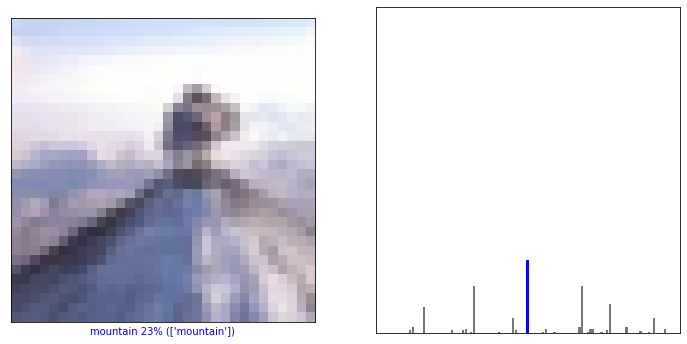

In [44]:
i = 0
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

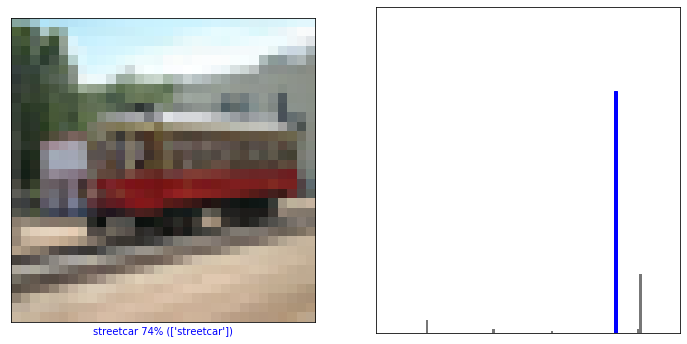

In [45]:
i = 12
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

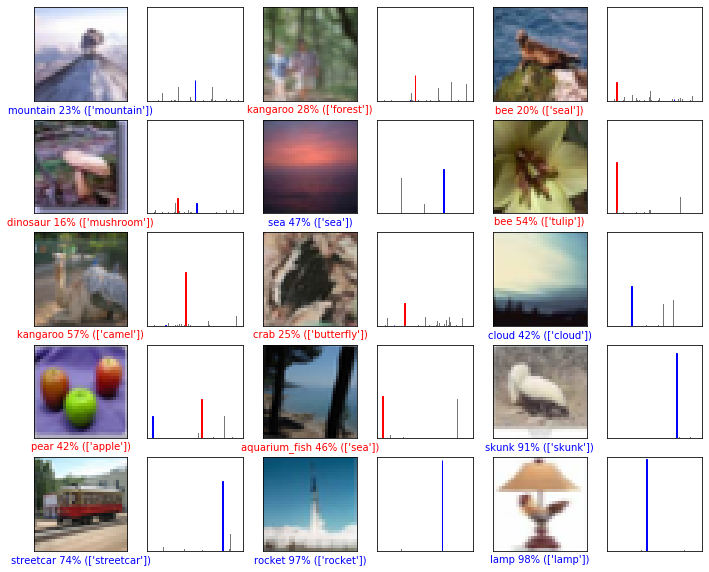

In [46]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [47]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(32, 32, 3)


`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [48]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


Now predict the image:

In [49]:
predictions_single = new_model.predict(img)

print(predictions_single)

[[8.88328078e-09 6.31486822e-04 1.99783244e-05 8.24343297e-04
  1.08055887e-04 4.73399705e-05 5.95807542e-05 8.79293401e-03
  1.91747695e-02 3.44473461e-04 1.40707550e-06 2.23322291e-04
  7.93473721e-02 6.94104019e-05 7.54382563e-05 5.24418429e-04
  3.16808860e-06 2.54478888e-04 2.36610393e-03 2.83052977e-05
  3.22740845e-04 9.45577995e-07 9.95476823e-03 2.58002372e-04
  5.62951609e-04 2.25264303e-04 9.57163423e-03 1.45861031e-02
  1.40283487e-06 2.95950635e-03 1.45430788e-01 9.15447963e-05
  1.02515041e-04 9.63476050e-05 2.78273073e-04 2.40959089e-05
  2.38046550e-06 1.08102313e-03 4.23463178e-04 3.93133424e-03
  2.22125719e-03 8.91650678e-04 3.84493207e-04 1.18033405e-07
  4.67745177e-02 9.24792513e-03 5.67957468e-04 2.12355750e-04
  2.32255858e-04 2.25646719e-01 3.35502933e-04 3.93232767e-07
  5.41316558e-06 2.17369164e-10 8.08013603e-04 2.57760286e-03
  1.17434608e-02 2.52166637e-06 1.24739017e-05 4.71303193e-03
  3.03412555e-04 2.37529861e-07 5.01326802e-08 1.96050096e-05
  1.5115

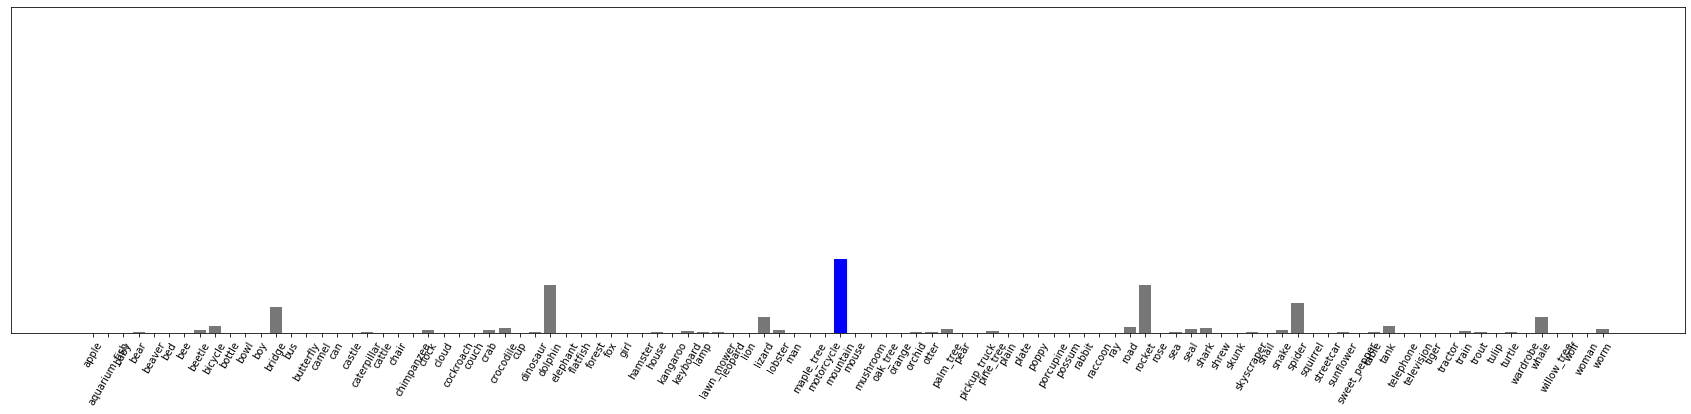

In [50]:
plt.figure(figsize=(30,6))
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(100), class_names, rotation=60)
plt.show()

In [51]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

49


In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.